In [71]:
import pandas as pd
from os import listdir
import os 
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [69]:
gabor_classification_stats_dir = '/home/eusobg/EUSO-SPB/euso-spb-patt-reco-v1/notebooks/gabor_classification_stats'
npy_dir_pathname = '/media/node15_data2/nn_training_data'

In [58]:
tsvfiles = [f for f in listdir(gabor_classification_stats_dir) if os.path.isfile(os.path.join(gabor_classification_stats_dir, f)) and f.endswith('.tsv')]
tsvfiles

['gabor_classification_0_150_10.tsv',
 'gabor_classification_150_300_10.tsv',
 'gabor_classification_1050_1200_10.tsv',
 'gabor_classification_1650_1800_10.tsv',
 'gabor_classification_4050_4200_10.tsv',
 'gabor_classification_3000_3150_10.tsv',
 'gabor_classification_900_1050_10.tsv',
 'gabor_classification_2850_3000_10.tsv',
 'gabor_classification_3300_3450_10.tsv',
 'gabor_classification_600_750_10.tsv',
 'gabor_classification_1500_1650_10.tsv',
 'gabor_classification_3450_3600_10.tsv',
 'gabor_classification_2250_2400_10.tsv',
 'gabor_classification_3900_4050_10.tsv',
 'gabor_classification_450_600_10.tsv',
 'gabor_classification_750_900_10.tsv',
 'gabor_classification_1200_1350_10.tsv',
 'gabor_classification_1800_1950_10.tsv',
 'gabor_classification_2100_2250_10.tsv',
 'gabor_classification_3150_3300_10.tsv',
 'gabor_classification_1950_2100_10.tsv',
 'gabor_classification_1350_1500_10.tsv',
 'gabor_classification_300_450_10.tsv',
 'gabor_classification_3600_3750_10.tsv',
 'gabor

In [59]:
tsvfiles.sort(key=lambda filename: int(re.search(r'_(\d+)_\d+_\d+\.tsv$',filename).group(1)))
tsvfiles

['gabor_classification_0_150_10.tsv',
 'gabor_classification_150_300_10.tsv',
 'gabor_classification_300_450_10.tsv',
 'gabor_classification_450_600_10.tsv',
 'gabor_classification_600_750_10.tsv',
 'gabor_classification_750_900_10.tsv',
 'gabor_classification_900_1050_10.tsv',
 'gabor_classification_1050_1200_10.tsv',
 'gabor_classification_1200_1350_10.tsv',
 'gabor_classification_1350_1500_10.tsv',
 'gabor_classification_1500_1650_10.tsv',
 'gabor_classification_1650_1800_10.tsv',
 'gabor_classification_1800_1950_10.tsv',
 'gabor_classification_1950_2100_10.tsv',
 'gabor_classification_2100_2250_10.tsv',
 'gabor_classification_2250_2400_10.tsv',
 'gabor_classification_2400_2550_10.tsv',
 'gabor_classification_2550_2700_10.tsv',
 'gabor_classification_2700_2850_10.tsv',
 'gabor_classification_2850_3000_10.tsv',
 'gabor_classification_3000_3150_10.tsv',
 'gabor_classification_3150_3300_10.tsv',
 'gabor_classification_3300_3450_10.tsv',
 'gabor_classification_3450_3600_10.tsv',
 'gabor

In [60]:
stat_results = None
for tsvfile in tsvfiles[1:]:
    stat_results_partial_df = pd.read_csv(os.path.join(gabor_classification_stats_dir, tsvfile), sep='\t')
    if stat_results is None:
        stat_results = stat_results_partial_df
    else:
        stat_results = stat_results.append(stat_results_partial_df, ignore_index=True)
    
stat_results        

,n,positive,negative,true_positive,true_negative,false_positive,false_negative,sensitivity,specificity,precision,negative_predictive_value,miss_rate,fall_out,false_discovery_rate,false_omission_rate,accuracy
0,150,4011,4011,3993,1266,2745,18,0.995512,0.315632,0.592609,0.985981,0.004488,0.684368,0.407391,0.014019,0.655572
1,160,4011,4011,3848,2811,1200,163,0.959362,0.700823,0.762282,0.945192,0.040638,0.299177,0.237718,0.054808,0.830092
2,170,4011,4011,57,1716,2295,3954,0.014211,0.427823,0.024235,0.302646,0.985789,0.572177,0.975765,0.697354,0.221017
3,180,4011,4011,389,775,3236,3622,0.096983,0.193219,0.107310,0.176257,0.903017,0.806781,0.892690,0.823743,0.145101
4,190,4011,4011,3336,3557,454,675,0.831713,0.886811,0.880211,0.840501,0.168287,0.113189,0.119789,0.159499,0.859262
5,200,4011,4011,3520,3385,626,491,0.877587,0.843929,0.849011,0.873323,0.122413,0.156071,0.150989,0.126677,0.860758
6,210,4011,4011,3827,2886,1125,184,0.954126,0.719521,0.772819,0.940065,0.045874,0.280479,0.227181,0.059935,0.836824
7,220,4011,4011,4000,1047,2964,11,0.997258,0.261032,0.574383,0.989603,0.002742,0.738968,0.425617,0.010397,0.629145
8,230,4011,4011,3771,2949,1062,240,0.940165,0.735228,0.780261,0.924741,0.059835,0.264772,0.219739,0.075259,0.837696
9,240,4011,4011,2599,3805,206,1412,0.647968,0.948641,0.926560,0.729346,0.352032,0.051359,0.073440,0.270654,0.798305


In [63]:
ax = stat_results.plot('n','precision')
stat_results.plot('n','fall_out', ax=ax)

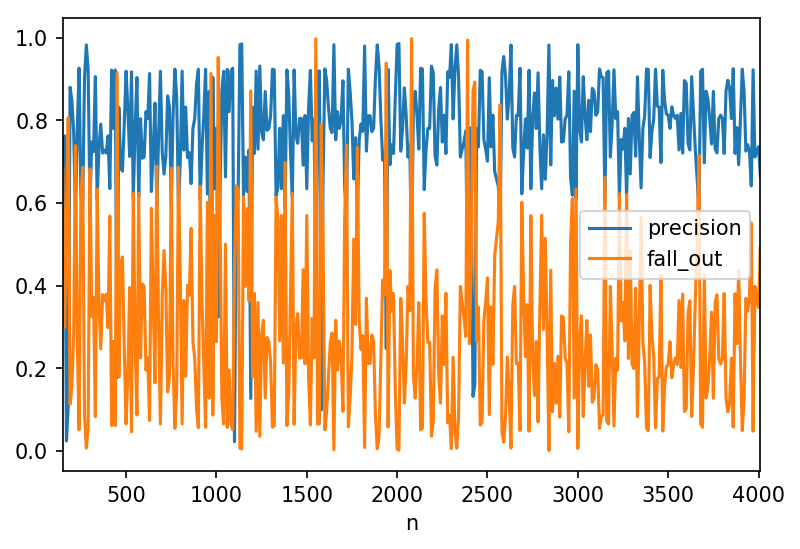

In [64]:
mpl.rcParams['figure.dpi'] = 150
plt.show()

In [72]:
xy_projections = np.load(os.path.join(npy_dir_pathname,'visible_showers','xy_projections.npy'))

In [75]:
stat_results[ stat_results['fall_out'] > 0.6]

,n,positive,negative,true_positive,true_negative,false_positive,false_negative,sensitivity,specificity,precision,negative_predictive_value,miss_rate,fall_out,false_discovery_rate,false_omission_rate,accuracy
0,150,4011,4011,3993,1266,2745,18,0.995512,0.315632,0.592609,0.985981,0.004488,0.684368,0.407391,0.014019,0.655572
3,180,4011,4011,389,775,3236,3622,0.096983,0.193219,0.107310,0.176257,0.903017,0.806781,0.892690,0.823743,0.145101
7,220,4011,4011,4000,1047,2964,11,0.997258,0.261032,0.574383,0.989603,0.002742,0.738968,0.425617,0.010397,0.629145
10,250,4011,4011,3977,1533,2478,34,0.991523,0.382199,0.616112,0.978302,0.008477,0.617801,0.383888,0.021698,0.686861
11,260,4011,4011,3996,1258,2753,15,0.996260,0.313637,0.592088,0.988217,0.003740,0.686363,0.407912,0.011783,0.654949
15,300,4011,4011,3993,1273,2738,18,0.995512,0.317377,0.593225,0.986057,0.004488,0.682623,0.406775,0.013943,0.656445
19,340,4011,4011,3986,1471,2540,25,0.993767,0.366741,0.610788,0.983289,0.006233,0.633259,0.389212,0.016711,0.680254
30,450,4011,4011,795,338,3673,3216,0.198205,0.084268,0.177932,0.095104,0.801795,0.915732,0.822068,0.904896,0.141237
39,540,4011,4011,3980,1510,2501,31,0.992271,0.376465,0.614103,0.979883,0.007729,0.623535,0.385897,0.020117,0.684368
42,570,4011,4011,3979,1511,2500,32,0.992022,0.376714,0.614138,0.979261,0.007978,0.623286,0.385862,0.020739,0.684368


150


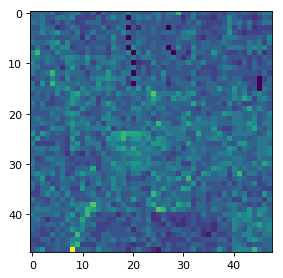

180


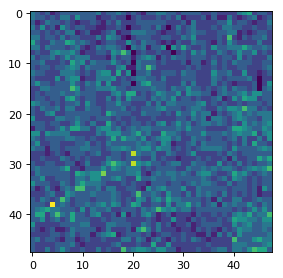

220


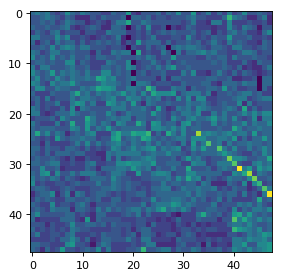

250


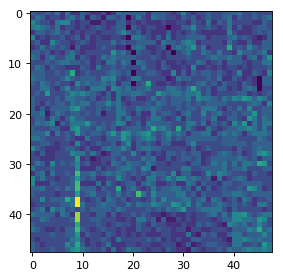

260


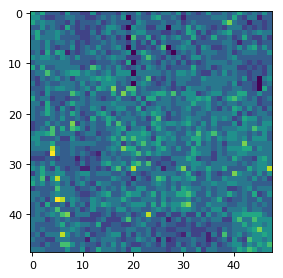

300


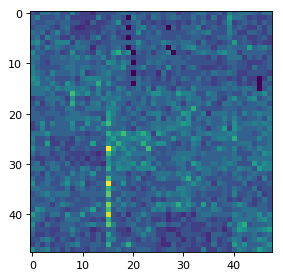

340


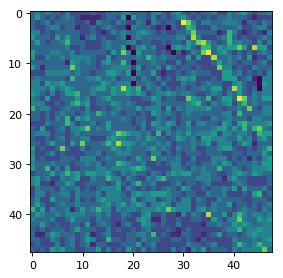

450


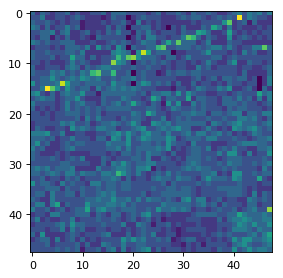

540


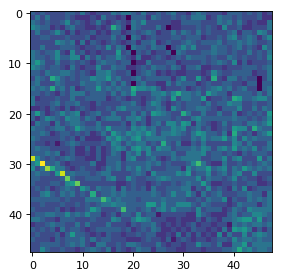

570


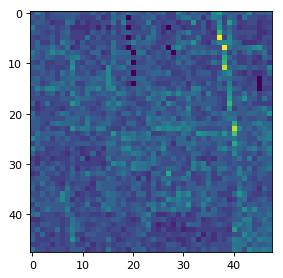

670


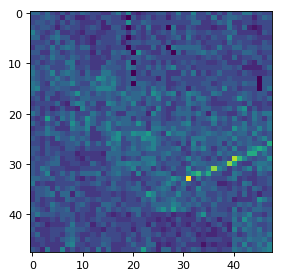

750


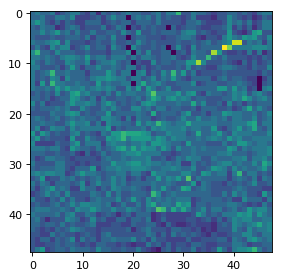

790


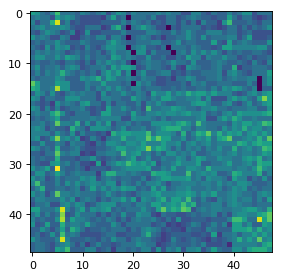

910


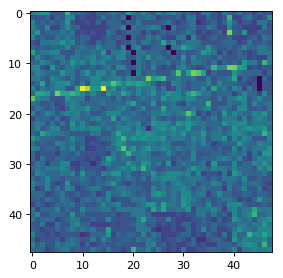

950


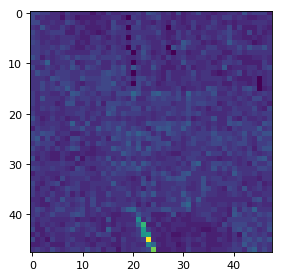

970


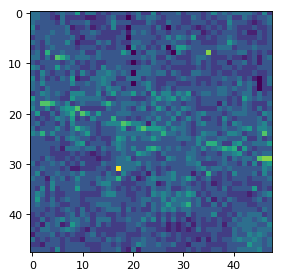

1010


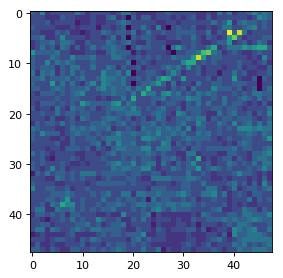

1110


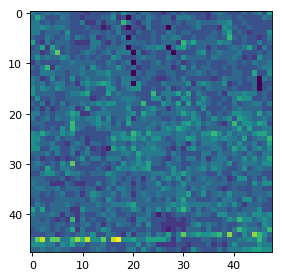

1120


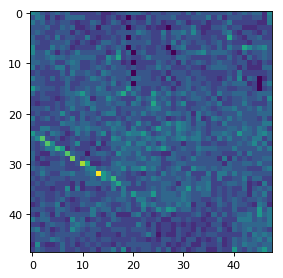

1150


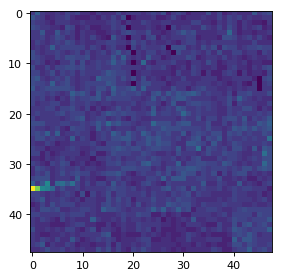

1190


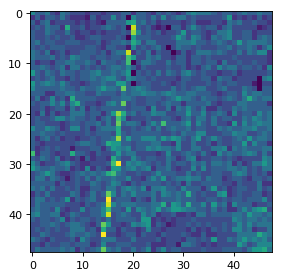

1330


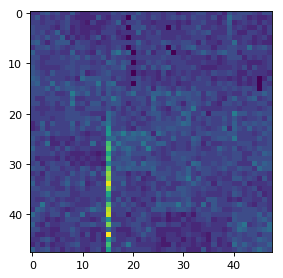

1380


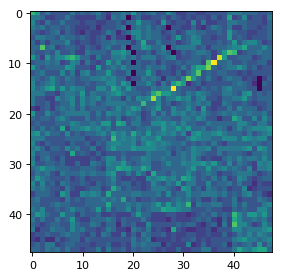

1420


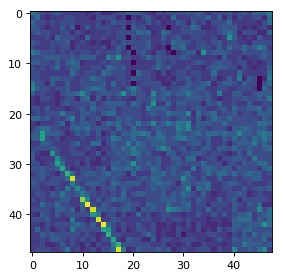

1550


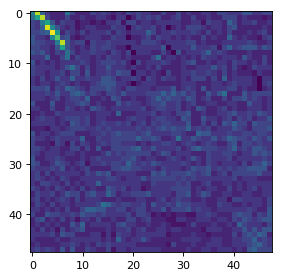

1580


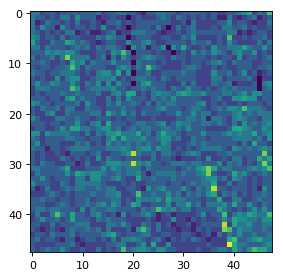

1720


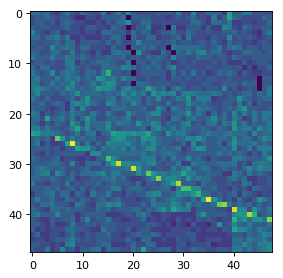

1780


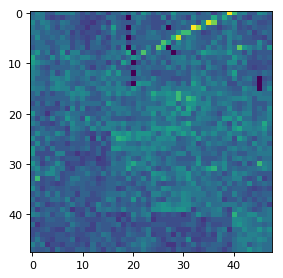

1940


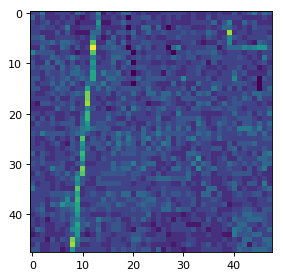

2080


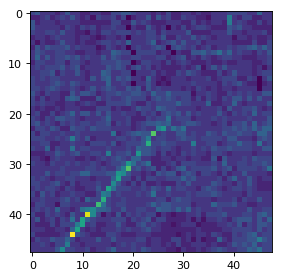

2390


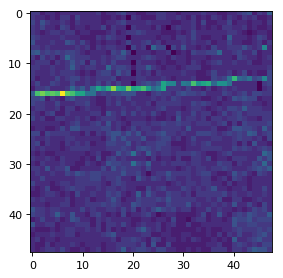

2420


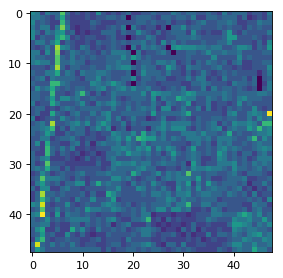

2430


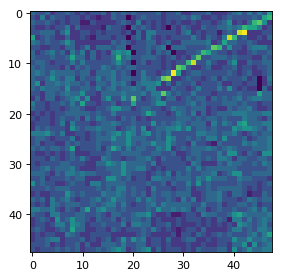

2570


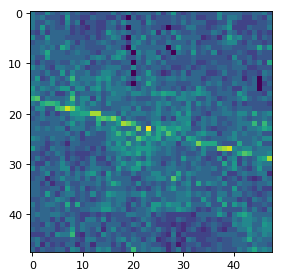

2690


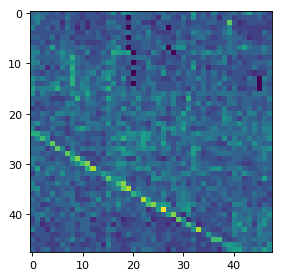

2970


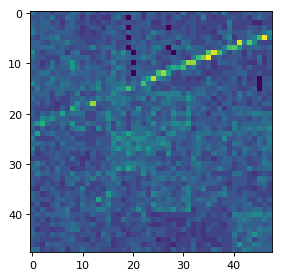

2990


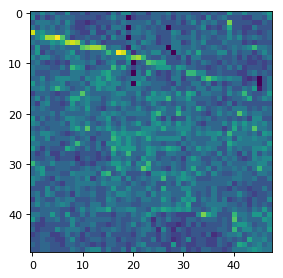

3150


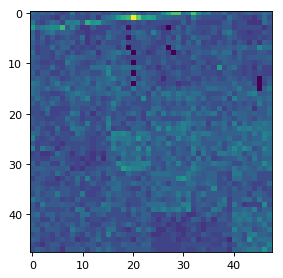

3230


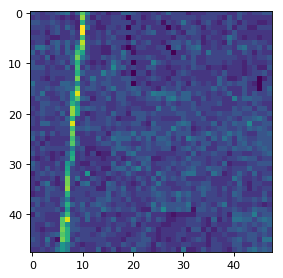

3270


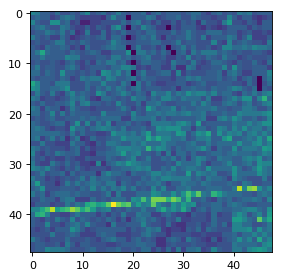

3670


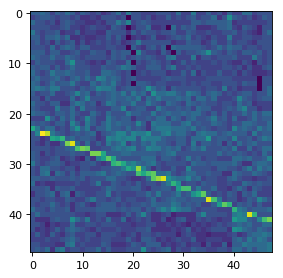

In [74]:
mpl.rcParams['figure.dpi'] = 80
for n in stat_results[ stat_results['fall_out'] > 0.6]['n']:
    print(n)
    plt.imshow(xy_projections[n])
    plt.show()

In [76]:
stat_results[ stat_results['fall_out'] < 0.2]

,n,positive,negative,true_positive,true_negative,false_positive,false_negative,sensitivity,specificity,precision,negative_predictive_value,miss_rate,fall_out,false_discovery_rate,false_omission_rate,accuracy
4,190,4011,4011,3336,3557,454,675,0.831713,0.886811,0.880211,0.840501,0.168287,0.113189,0.119789,0.159499,0.859262
5,200,4011,4011,3520,3385,626,491,0.877587,0.843929,0.849011,0.873323,0.122413,0.156071,0.150989,0.126677,0.860758
9,240,4011,4011,2599,3805,206,1412,0.647968,0.948641,0.926560,0.729346,0.352032,0.051359,0.073440,0.270654,0.798305
12,270,4011,4011,3265,3663,348,746,0.814011,0.913239,0.903681,0.830801,0.185989,0.086761,0.096319,0.169199,0.863625
13,280,4011,4011,1585,3983,28,2426,0.395163,0.993019,0.982641,0.621470,0.604837,0.006981,0.017359,0.378530,0.694091
14,290,4011,4011,2764,3782,229,1247,0.689105,0.942907,0.923488,0.752038,0.310895,0.057093,0.076512,0.247962,0.816006
18,330,4011,4011,3200,3678,333,811,0.797806,0.916978,0.905746,0.819336,0.202194,0.083022,0.094254,0.180664,0.857392
27,420,4011,4011,2925,3763,248,1086,0.729245,0.938170,0.921841,0.776036,0.270755,0.061830,0.078159,0.223964,0.833707
29,440,4011,4011,2919,3764,247,1092,0.727749,0.938419,0.921984,0.775124,0.272251,0.061581,0.078016,0.224876,0.833084
31,460,4011,4011,3545,3292,719,466,0.883819,0.820743,0.831379,0.875998,0.116181,0.179257,0.168621,0.124002,0.852281


In [78]:
len(stat_results[ stat_results['fall_out'] < 0.2])/len(stat_results)

0.35400516795865633

In [79]:
len(stat_results[ stat_results['fall_out'] < 0.5])/len(stat_results)

0.8320413436692506

In [80]:
stat_results[ stat_results['fall_out'] < 0.1]

,n,positive,negative,true_positive,true_negative,false_positive,false_negative,sensitivity,specificity,precision,negative_predictive_value,miss_rate,fall_out,false_discovery_rate,false_omission_rate,accuracy
9,240,4011,4011,2599,3805,206,1412,0.647968,0.948641,0.926560,0.729346,0.352032,0.051359,0.073440,0.270654,0.798305
12,270,4011,4011,3265,3663,348,746,0.814011,0.913239,0.903681,0.830801,0.185989,0.086761,0.096319,0.169199,0.863625
13,280,4011,4011,1585,3983,28,2426,0.395163,0.993019,0.982641,0.621470,0.604837,0.006981,0.017359,0.378530,0.694091
14,290,4011,4011,2764,3782,229,1247,0.689105,0.942907,0.923488,0.752038,0.310895,0.057093,0.076512,0.247962,0.816006
18,330,4011,4011,3200,3678,333,811,0.797806,0.916978,0.905746,0.819336,0.202194,0.083022,0.094254,0.180664,0.857392
27,420,4011,4011,2925,3763,248,1086,0.729245,0.938170,0.921841,0.776036,0.270755,0.061830,0.078159,0.223964,0.833707
29,440,4011,4011,2919,3764,247,1092,0.727749,0.938419,0.921984,0.775124,0.272251,0.061581,0.078016,0.224876,0.833084
35,500,4011,4011,2989,3748,263,1022,0.745201,0.934430,0.919127,0.785744,0.254799,0.065570,0.080873,0.214256,0.839816
38,530,4011,4011,2078,3824,187,1933,0.518075,0.953378,0.917439,0.664235,0.481925,0.046622,0.082561,0.335765,0.735727
41,560,4011,4011,3289,3661,350,722,0.819995,0.912740,0.903820,0.835273,0.180005,0.087260,0.096180,0.164727,0.866367


In [81]:
len(stat_results[ stat_results['fall_out'] < 0.1])/len(stat_results)

0.22997416020671835